# Load Data

In [28]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [5]:
# read csv data files in dataframes
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

# Explore Data

## Calendar

In [6]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [7]:
calendar.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

`available` is coded as `f` (false) and `t` (true) 

In [8]:
# check percentages of missing values in each column
calendar.isnull().mean()

listing_id    0.000000
date          0.000000
available     0.000000
price         0.508716
dtype: float64

About half the prices are missing so we'll only focus on availability trend using this data. 

## Listings

In [9]:
# check first five rows in listings
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [10]:
# view column names 
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [11]:
# check statistics of numerical columns 
listings.describe() 

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


## Reviews

In [12]:
# check top 5 rows of reviews 
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [13]:
# check missing values 
reviews.isnull().mean()

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000776
dtype: float64

In [14]:
# check date range
print("The earliest date in the data set is {}; the latest date is {}"
      .format(reviews.date.min(),reviews.date.max()))

The earliest date in the data set is 2009-03-21; the latest date is 2016-09-06


# Analysis

## What is the availability trend in Boston Area?

### Trend by Day

In [15]:
# convert date from string to datetime object

calendar["date"] = pd.to_datetime(calendar["date"])
calendar.date.describe()

count                 1308890
unique                    365
top       2016-12-27 00:00:00
freq                     3586
first     2016-09-06 00:00:00
last      2017-09-05 00:00:00
Name: date, dtype: object

In [16]:
# calendar is coded as f and t string objects
calendar.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [17]:
# convert f to 0 (not available), and t to 1 (available)
calendar["available"]=calendar["available"].apply(lambda x:1 if x=="t" else 0)
calendar.available.value_counts()

0    665853
1    643037
Name: available, dtype: int64

In [18]:
# compute availability (percentage of units available) of to each day
# store in calendar_daily dataframe
calendar_daily = calendar.groupby("date")["available"].mean().reset_index()
calendar_daily.head()

,date,available
0,2016-09-06,0.158951
1,2016-09-07,0.259900
2,2016-09-08,0.278583
3,2016-09-09,0.273564
4,2016-09-10,0.266592


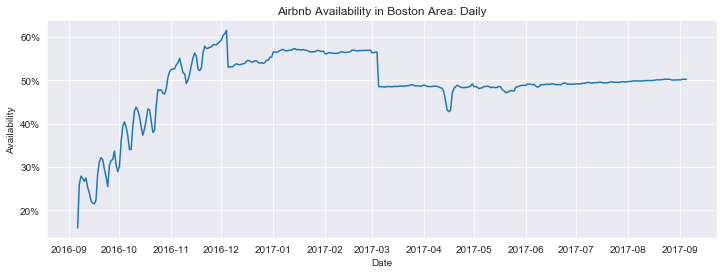

In [30]:
# view overall trend of availability by day
sns.set_style("darkgrid")
plt.figure(figsize=(12,4))

ax=sns.lineplot(x=calendar_daily.date,y=calendar_daily.available)
ax.set(xlabel="Date",ylabel="Availability", title="Airbnb Availability in Boston Area: Daily")

# set y tick values to % 
y_tickvalue=['{:,.0f}'.format(x*100) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_tickvalue)

# set x tick increments 
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months)

plt.savefig("availability_trend_by_day.png")

In [17]:
# explore trend throughout the week
calendar["day_of_week"] = calendar["date"].dt.dayofweek
calendar_weekly = calendar.groupby("day_of_week")["available"].mean().reset_index()
calendar_weekly

,day_of_week,available
0,0,0.495586
1,1,0.491071
2,2,0.492385
3,3,0.489092
4,4,0.487998
5,5,0.488374
6,6,0.494487


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

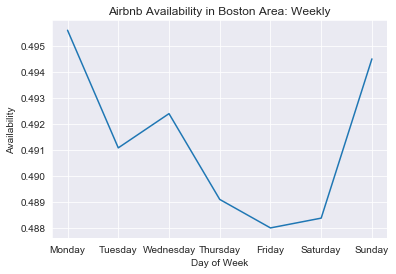

In [18]:
sns.set_style("darkgrid")
ax=sns.lineplot(x=calendar_weekly.day_of_week,y=calendar_weekly.available)
ax.set(xlabel="Day of Week",ylabel="Availability", title="Airbnb Availability in Boston Area: Weekly")
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

In [19]:
# explore monthly trend

calendar["month"] = calendar["date"].dt.month
calendar_monthly= calendar.groupby("month")["available"].mean().reset_index()
calendar_monthly

,month,available
0,1,0.568348
1,2,0.565792
2,3,0.496384
3,4,0.477617
4,5,0.482162
5,6,0.490156
6,7,0.494423
7,8,0.499802
8,9,0.310448
9,10,0.416899


[Text(0, 0.5, 'Availability'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Airbnb Availability in Boston Area: Monthly')]

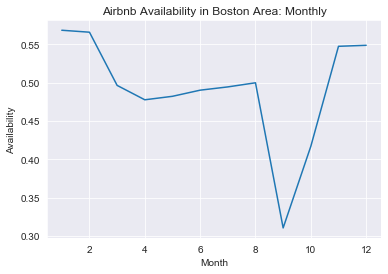

In [20]:
sns.set_style("darkgrid")
ax=sns.lineplot(x=calendar_monthly.month,y=calendar_monthly.available)
ax.set(xlabel="Month",ylabel="Availability", title="Airbnb Availability in Boston Area: Monthly")

# How much does each type of rooms cost in each neighbourhood? 

In [21]:
# listing price is coded as a string
listings.price.head()

0    $250.00
1     $65.00
2     $65.00
3     $75.00
4     $79.00
Name: price, dtype: object

In [22]:
# convert listing price from string to numeric
listings["price"]=listings["price"].replace('\$|\,','',regex=True).astype(float)
listings["price"].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [23]:
null_proportion=pd.DataFrame(listings.isnull().mean().reset_index())
null_proportion.columns =["column","null_proportion"]

In [24]:
listings.neighbourhood_cleansed.value_counts()

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Mattapan                    24
Bay Village                 24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

In [25]:
neighbourhood_list=listings["neighbourhood_cleansed"].dropna().unique()
sorted_neighbourhood=sorted(neighbourhood_list)
sorted_neighbourhood

['Allston',
 'Back Bay',
 'Bay Village',
 'Beacon Hill',
 'Brighton',
 'Charlestown',
 'Chinatown',
 'Dorchester',
 'Downtown',
 'East Boston',
 'Fenway',
 'Hyde Park',
 'Jamaica Plain',
 'Leather District',
 'Longwood Medical Area',
 'Mattapan',
 'Mission Hill',
 'North End',
 'Roslindale',
 'Roxbury',
 'South Boston',
 'South Boston Waterfront',
 'South End',
 'West End',
 'West Roxbury']

In [26]:
listings.property_type.value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [27]:
listings.room_type.value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

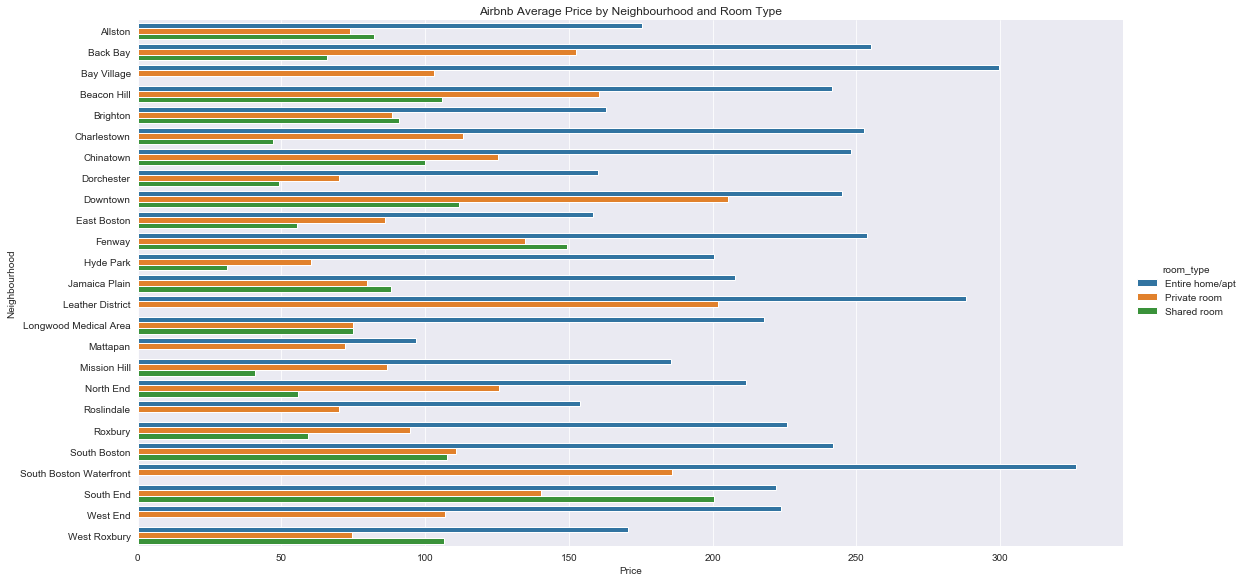

In [28]:
g=sns.catplot(y="neighbourhood_cleansed",x="price",data=listings,hue="room_type",
              kind="bar",height=8,aspect=2,ci=None,orient="h",col_order="neighbourhood_cleansed",order=sorted_neighbourhood)

g.set(xlabel="Price",ylabel="Neighbourhood",title="Airbnb Average Price by Neighbourhood and Room Type")

# Can .... predict rental price? 

In [29]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [30]:
listings.shape

(3585, 95)

In [31]:
listings.host_is_superhost.value_counts()

f    3178
t     407
Name: host_is_superhost, dtype: int64

In [32]:
listings.bedrooms.value_counts()

1.0    2379
2.0     693
0.0     287
3.0     155
4.0      45
5.0      16
Name: bedrooms, dtype: int64

In [33]:
listings.bathrooms.value_counts()

1.0    2751
2.0     478
1.5     208
2.5      68
3.0      21
3.5      13
0.0      13
0.5       7
5.0       5
6.0       4
4.0       2
4.5       1
Name: bathrooms, dtype: int64

In [34]:
listings.beds.value_counts()

1.0     2165
2.0      953
3.0      275
4.0      106
5.0       40
6.0       16
7.0        8
8.0        6
0.0        4
9.0        2
16.0       1
Name: beds, dtype: int64

In [35]:
listings.review_scores_rating.describe()

count    2772.000000
mean       91.916667
std         9.531686
min        20.000000
25%        89.000000
50%        94.000000
75%        98.250000
max       100.000000
Name: review_scores_rating, dtype: float64

In [36]:
# select neighbourhood_cleansed, bedrooms, bathrooms, room_type, review_scores_rating, beds

listings_rm_nan = listings.dropna(how="any",subset=["neighbourhood_cleansed","bedrooms","bathrooms",
                                                   "room_type","review_scores_rating","beds"],axis=0)
y=listings_rm_nan["price"]

# create dummy variables for categorical values 
X_categorical = listings_rm_nan[["room_type","neighbourhood_cleansed"]]
X_categorical_dummy_coded = pd.get_dummies(X_categorical)
X_categorical_dummy_coded.shape

(2751, 28)

In [37]:
X_num = listings_rm_nan[["bedrooms","bathrooms","review_scores_rating","beds"]]

X=pd.concat([X_num,X_categorical_dummy_coded],axis=1)
# check to make sure X and y have equal number of rows
X.shape[0]==y.shape[0]

True

In [38]:
# split X, y to test and train 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


linear_model = LinearRegression(normalize=True)
linear_model.fit(X_train,y_train)
linear_model.score(X_test,y_test)

0.5957789031473578

In [39]:
import statsmodels.api as sm
results=sm.OLS(y_train,X_train).fit() #ordinary least squares 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     126.8
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:10:45   Log-Likelihood:                -12354.
No. Observations:                2200   AIC:                         2.477e+04
Df Residuals:                    2169   BIC:                         2.495e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
bedrooms                                          52.6352      2.767     19.022      0.000      47.209      58.062
bathrooms                                         28.6397      3.144      9.109      0.000      22.474      34.806
review_scores_rating                               0.5281      0.153      3.462      0.001       0.229       0.827
beds                                              12.3008      1.962      6.269      0.000       8.453      16.149
room_type_Entire home/apt                         21.5758     13.505      1.598      0.110      -4.908      48.060
room_type_Private room                           -37.3585     13.353     -2.798      0.005     -63.544     -11.173
room_type_Shared room                            -53.2433     16.378     -3.251      0.001     -85.361     -21.125
neighbourhood_cleansed_Allston                   -33.9025      6.045     -5.609      0.000     -45.756     -22.049
neighbourhood_cleansed_Back Bay                   59.5182      5.834     10.202      0.000      48.077      70.959
neighbourhood_cleansed_Bay Village                37.3833     20.685      1.807      0.071      -3.181      77.947
neighbourhood_cleansed_Beacon Hill                52.3358      6.491      8.063      0.000      39.607      65.065
neighbourhood_cleansed_Brighton                  -38.8972      6.942     -5.603      0.000     -52.510     -25.284
neighbourhood_cleansed_Charlestown                11.5720      9.013      1.284      0.199      -6.103      29.247
neighbourhood_cleansed_Chinatown                  44.5857     12.636      3.529      0.000      19.806      69.365
neighbourhood_cleansed_Dorchester                -54.9239      5.805     -9.462      0.000     -66.307     -43.541
neighbourhood_cleansed_Downtown                   51.8086      7.546      6.866      0.000      37.011      66.606
neighbourhood_cleansed_East Boston               -35.4503      6.916     -5.126      0.000     -49.013     -21.887
neighbourhood_cleansed_Fenway                     22.1291      6.006      3.685      0.000      10.351      33.907
neighbourhood_cleansed_Hyde Park                 -63.7107     15.189     -4.194      0.000     -93.498     -33.923
neighbourhood_cleansed_Jamaica Plain             -35.0549      5.471     -6.407      0.000     -45.785     -24.325
neighbourhood_cleansed_Leather District           30.5046     45.780      0.666      0.505     -59.272     120.281
neighbourhood_cleansed_Longwood Medical Area      -6.3929     37.410     -0.171      0.864     -79.757      66.971
neighbourhood_cleansed_Mattapan                  -66.4862     18.224     -3.648      0.000    -102.224     -30.749
neighbourhood_cleansed_Mission Hill              -30.4807      8.534     -3.572      0.000   